In [1]:
! git clone https://www.github.com/DS3001/the_bootstrap
    

fatal: destination path 'the_bootstrap' already exists and is not an empty directory.


In [ ]:
# Question 2

In [2]:
import pandas as pd
df = pd.read_csv('./the_bootstrap/data/mammogram.csv')

In [3]:
print(df.head(10))

   treatment breast_cancer_death
0  mammogram                 yes
1  mammogram                 yes
2  mammogram                 yes
3  mammogram                 yes
4  mammogram                 yes
5  mammogram                 yes
6  mammogram                 yes
7  mammogram                 yes
8  mammogram                 yes
9  mammogram                 yes


In [4]:
breast_cancer_pred = pd.crosstab(df['treatment'],df['breast_cancer_death'])
print(breast_cancer_pred)

breast_cancer_death     no  yes
treatment                      
control              44405  505
mammogram            44425  500


In [5]:
# This cross-tabulation is interesting because it shows us that there isnt a significant numerical difference between the death rate between women who have experienced treatment (mammogram), versus those who did not received a mammogram

In [6]:
# Question 2.2
# Full sample promotion averages and difference:
df['no'] = 0
df.loc[df['breast_cancer_death']=='no','no']=1

pd.crosstab(df['treatment'],df['breast_cancer_death'])

control = df.loc[df['treatment'] == 'control','no'].mean()
mammogram = df.loc[df['treatment'] =='mammogram','no'].mean()
diff_0 =  mammogram - control
print(diff_0)

0.00011505110015985753


In [7]:
# There is very small difference between the survival rate of women who have gotten a mammogram vs not

In [8]:
# Control data:
import numpy as np
df_control = df.loc[df['treatment'] =='control','no']
N_control = df_control.shape[0]
print(N_control)
# Mammogram data:
df_mammogram = df.loc[df['treatment'] =='mammogram', 'no']
N_mammogram = df_mammogram.shape[0]
print(N_mammogram)


44910
44925


In [9]:
# Simulation:
S = 1000
rate_control = np.zeros(S) # Female promotion rate
rate_mammogram = np.zeros(S) # Male promotion rate
diff = np.zeros(S)  # Difference in promotion rates

In [10]:
# Bootstrapping:
for s in range(S):
    sample_control = df_control.sample(N_control,replace=True) # Resample women
    rate_control[s] = sample_control.mean(numeric_only=True)
    sample_mammogram = df_mammogram.sample(N_mammogram,replace=True) # Resample men
    rate_mammogram[s] = sample_mammogram.mean(numeric_only=True)
    diff[s] = rate_control[s]-rate_mammogram[s] # Difference in rates
    # chat gpt told me to put 'numeric_only = True' to help with an error i was getting that was causing the code to run for a long time
    #prompt = ''

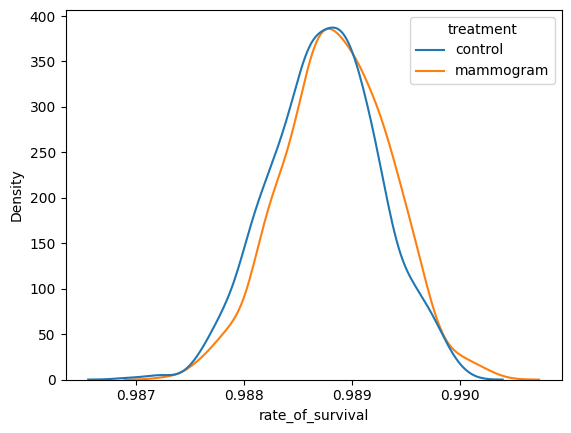

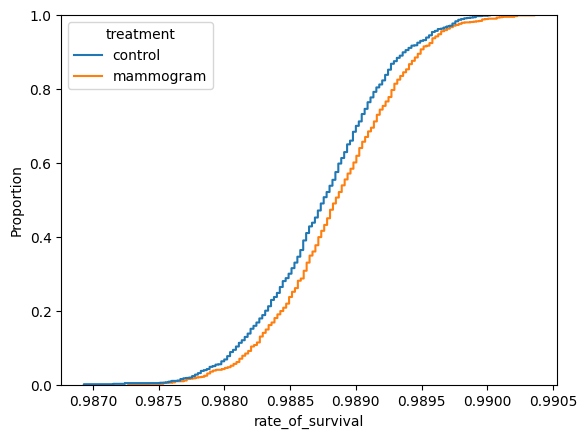

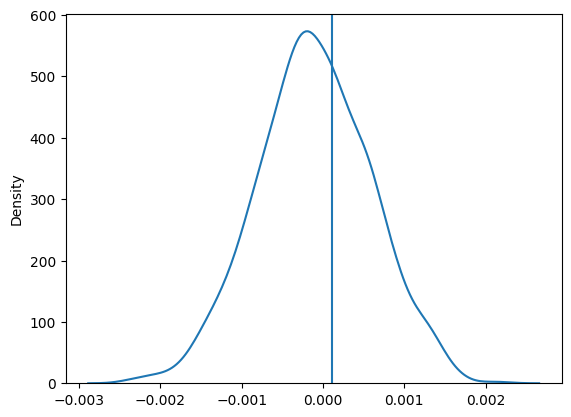

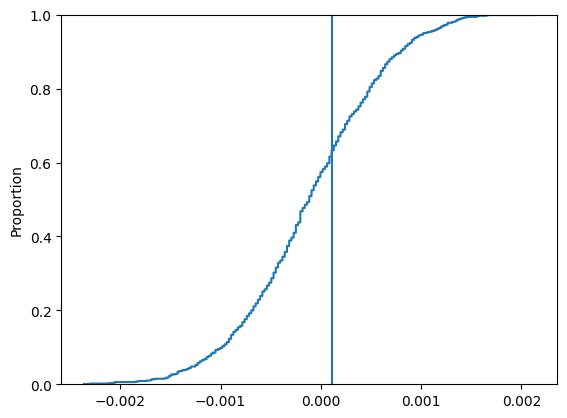

In [11]:
#combining the data into one set
rdf_C = pd.DataFrame({'treatment':'control','rate_of_survival':rate_control})
rdf_M = pd.DataFrame({'treatment':'mammogram','rate_of_survival':rate_mammogram})
rdf = pd.concat([rdf_C,rdf_M],axis=0)
# doing some plot nows
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Density plot of promotion rates:
sns.kdeplot(data=rdf,x='rate_of_survival',hue='treatment')
plt.show()

# ECDF of promotion rates:
sns.ecdfplot(data=rdf,x='rate_of_survival',hue='treatment')
plt.show()

#Density plot of differences in rates:
ax = sns.kdeplot(diff)
ax.axvline(x = diff_0)
plt.show()

# ECDF of differences in rates:
ax = sns.ecdfplot(diff)
ax.axvline(x = diff_0)
plt.show()

Point Estimate:  0.00011505110015985753
CI: [-0.00125043  0.00102168]


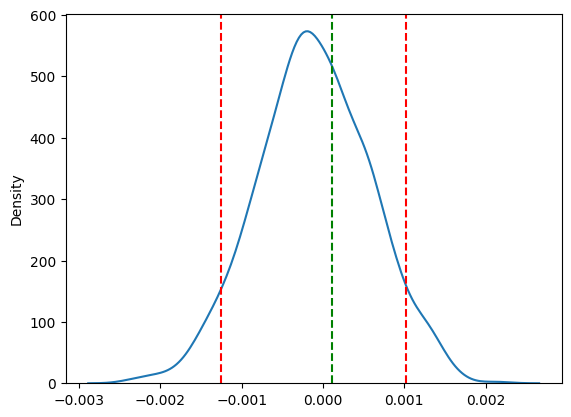

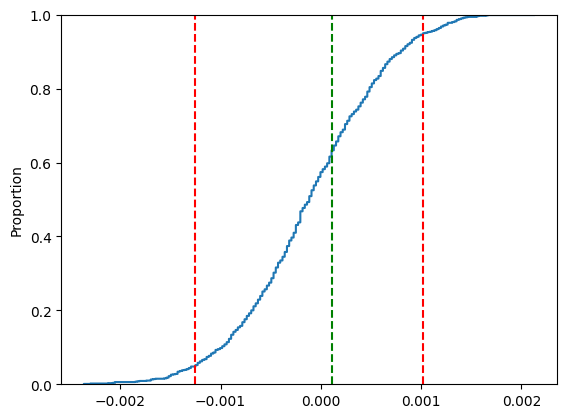

In [12]:
CI = np.quantile(diff,[.05,.95]) # Compute 90% CI
print('Point Estimate: ', diff_0)
print( 'CI: ' + str(CI) )

# Density plot of differences in rates, CI:
ax = sns.kdeplot(diff)
ax.axvline(x = diff_0,linestyle='dashed',color='green') # Point estimate
ax.axvline(x = CI[0],linestyle='dashed',color='red') # Lower bound
ax.axvline(x = CI[1],linestyle='dashed',color='red') # Upper bound
plt.show()

# ECDF of differences in rates, CI:
ax = sns.ecdfplot(diff)
ax.axvline(x = diff_0,linestyle='dashed',color='green') # Point estimate
ax.axvline(x = CI[0],linestyle='dashed',color='red') # Lower bound
ax.axvline(x = CI[1],linestyle='dashed',color='red') # Upper bound
plt.show()

In [ ]:
#Question 1

In [13]:
import random

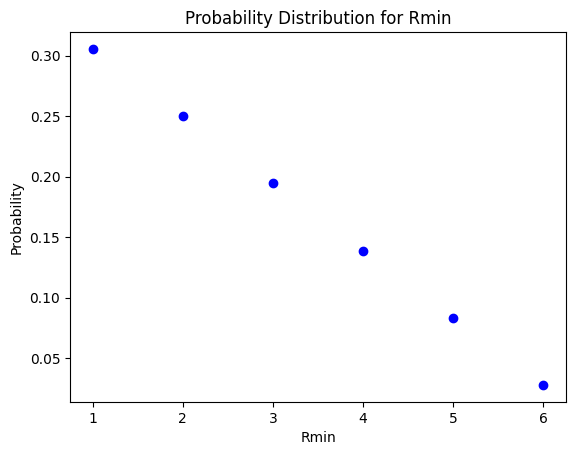

Probability Distribution for Rmin:
   Rmin  Probability
0     1     0.305556
1     2     0.250000
2     3     0.194444
3     4     0.138889
4     5     0.083333
5     6     0.027778

Expected Value of Rmin: 2.53


In [14]:
num_dice = 2
D = [1, 2, 3, 4, 5, 6]
total_outcomes = 6 ** num_dice
pr = np.zeros(6)
Rmin_values = np.arange(1,7)

for i in range(6):
    for j in range(6):
        min_value = min(D[i], D[j])
        pr[min_value - 1] += 1 / 36

plt.scatter(Rmin_values, pr, color='blue', marker='o')
plt.xlabel("Rmin")
plt.ylabel("Probability")
plt.title('Probability Distribution for Rmin')
plt.show()

df_Rmin = pd.DataFrame({'Rmin': Rmin_values, 'Probability': pr})
print("Probability Distribution for Rmin:")
print(df_Rmin)

expected_value = np.sum(Rmin_values * pr)
print(f"\nExpected Value of Rmin: {expected_value:.2f}")

In [ ]:
#The likelihood that Rmin is 6 is much lower that 1. This shows that the probability of each value decreases as the minimum increases.

In [ ]:
num_dice = 2
D = [1, 2, 3, 4, 5, 6]
total_outcomes = 6 ** num_dice
pr = np.zeros(6)
Rmin_values = np.arange(1,7)

for i in range(6):
    for j in range(6):
        min_value = min(D[i], D[j])
        pr[min_value - 1] += 1 / 36

F = np.cumsum(pr)

plt.scatter(Rmin_values ,F)
plt.plot(Rmin_values,F)
plt.xlabel("x")
plt.ylabel("F(x) = pr[Rmin = i]")
plt.title('Distribution Function of Rmin')
plt.show()

df = pd.DataFrame({'x':Rmin_values,'F':F})
df